# #***Data loading rerec***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

real_rerec_audio=[]

fake_rerec_audio=[]

# fake_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake']

# real_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/real','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real']





fake_rerecaudio_path='/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake'

real_rerecaudio_path='/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real'

# for _dir in fake_audio_path:

for filename in os.listdir(fake_rerecaudio_path):

    if filename.endswith('.wav'):

        fake_rerec_audio.append(os.path.join(fake_rerecaudio_path, filename))

#         print(filename)

            

# for _dir in real_audio_path:

for filename in os.listdir(real_rerecaudio_path):

    if filename.endswith('.wav'):

        real_rerec_audio.append(os.path.join(real_rerecaudio_path, filename))



# real_audio_files = [os.path.join(real_audio_path, file) for file in os.listdir(real_audio_path) if file.endswith('.wav')]

# fake_audio_files = [os.path.join(fake_audio_path, file) for file in os.listdir(fake_audio_path) if file.endswith('.wav')]



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import librosa

import matplotlib.pyplot as plt

import seaborn as sns

from tqdm import tqdm

import IPython

from librosa import display

from IPython import display as ipd

In [3]:
print("Number of tuples in fake_audio dataset: ", len(fake_rerec_audio))
print("Number of tuples in real_audio dataset: ", len(real_rerec_audio))


Number of tuples in fake_audio dataset:  5104
Number of tuples in real_audio dataset:  5104


***For Rerecorded Audio***

> Visualise data

In [4]:
import os

def remove_zero_byte_files(folder):
    # Loop through all files in the specified directory
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        
        # Check if it's a file and if its size is 0 bytes
        if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
            print(f"Removing {file_path}")
            os.remove(file_path)

        # print("hello")
# Specify the directory containing your audio files
directory_path = real_rerecaudio_path  # Replace with your directory path
remove_zero_byte_files(directory_path)

In [5]:
import os
import hashlib

def calculate_md5(file_path, chunk_size=4096):
    """Calculates MD5 hash of a file to identify duplicates."""
    hash_md5 = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def remove_duplicates(directory):
    """Remove duplicate files in a directory based on file content."""
    hashes = {}  # Dictionary to store hashes and their corresponding file paths

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Ensure it is a file and not a directory
        if os.path.isfile(file_path):
            # Calculate hash of the file
            file_hash = calculate_md5(file_path)
            
            # Check if the hash already exists in the dictionary
            if file_hash in hashes:
                print(f"Duplicate found and removing: {file_path}")
                os.remove(file_path)
            else:
                hashes[file_hash] = file_path

    print("Finished removing duplicate files.")

# Usage
directory = real_rerecaudio_path  # Replace with the actual path
remove_duplicates(directory)


Finished removing duplicate files.


In [6]:
!pip install librosa scikit-learn

In [7]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler

def preprocess_audio(file_path, target_sample_rate=16000, target_length=16000):
    """Load, resample, pad, and normalize audio data."""
    # Load audio with librosa at the target sample rate
    audio, sample_rate = librosa.load(file_path, sr=target_sample_rate)
    
    # Zero-padding or truncation to match the target length
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)), 'constant')
    else:
        audio = audio[:target_length]
    
    return audio

def standardize_audio_data(directory):
    """Process all audio files in a directory and normalize data."""
    audio_data = []
    
    # Process each audio file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        if os.path.isfile(file_path) and filename.lower().endswith(('.wav', '.mp3')):
            audio = preprocess_audio(file_path)
            audio_data.append(audio)
    
    # Convert to numpy array for batch processing
    audio_data = np.array(audio_data)
    
    # Apply StandardScaler normalization
    scaler = StandardScaler()
    audio_data_normalized = scaler.fit_transform(audio_data)
    
    return audio_data_normalized

# Usage
directory = real_rerecaudio_path  # Replace with the actual path
processed_data = standardize_audio_data(directory)

# Now, processed_data contains zero-padded and normalized audio samples ready for model training.


In [8]:
preprocessed_real_rerec=[]
for filename in os.listdir(real_rerecaudio_path):

    if filename.endswith('.wav'):

        preprocessed_real_rerec.append(os.path.join(real_rerecaudio_path, filename))

In [9]:
print("Number of tuples in real_audio dataset: ", len(preprocessed_real_rerec))
# print("Number of tuples in real_audio dataset: ", len(real_rerec_audio))


Number of tuples in real_audio dataset:  5104


In [10]:
# loading audio

ipd.Audio('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake/recording1.wav_norm_mono.wav')

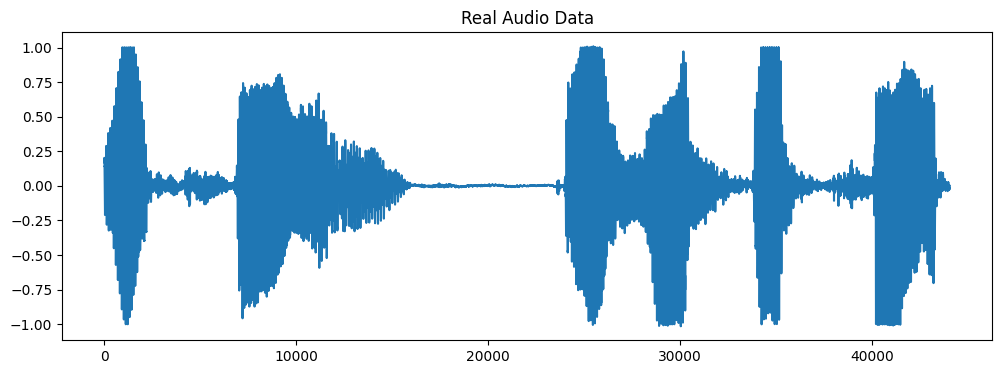

In [11]:
real_ad, real_sr = librosa.load(real_rerec_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(real_ad)

plt.title("Real Audio Data")

plt.show()

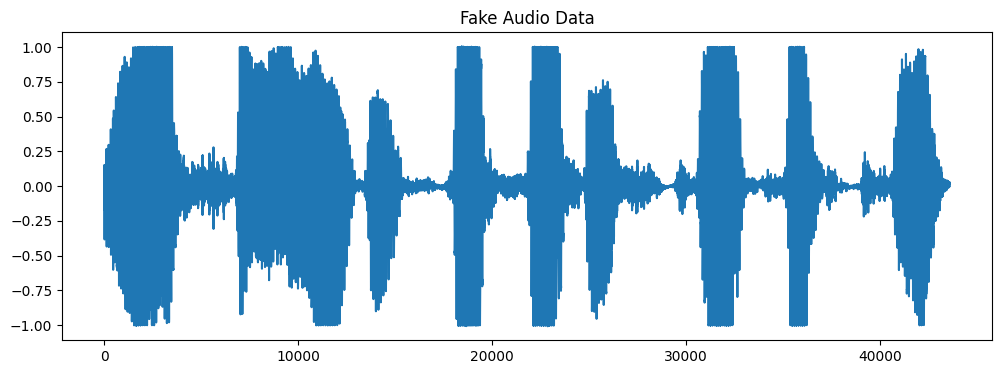

In [12]:
fake_ad, fake_sr = librosa.load(fake_rerec_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(fake_ad)

plt.title("Fake Audio Data")

plt.show()

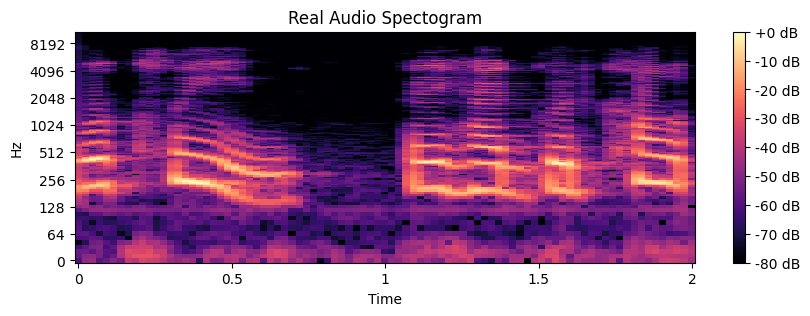

In [13]:
real_spec = np.abs(librosa.stft(real_ad))

real_spec = librosa.amplitude_to_db(real_spec, ref=np.max)



plt.figure(figsize=(10, 3))

librosa.display.specshow(real_spec, sr=real_sr, x_axis="time", y_axis="log")

plt.colorbar(format="%+2.0f dB")

plt.title("Real Audio Spectogram")

plt.show()

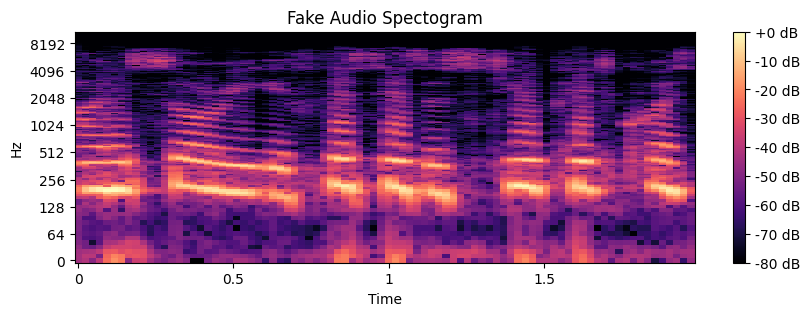

In [14]:
fake_spec = np.abs(librosa.stft(fake_ad))

fake_spec = librosa.amplitude_to_db(fake_spec, ref=np.max)

plt.figure(figsize=(10, 3))

librosa.display.specshow(fake_spec, sr=fake_sr, x_axis="time", y_axis="log")

plt.colorbar(format="%+2.0f dB")

plt.title("Fake Audio Spectogram")

plt.show()

fake data

In [15]:
import os
folders = os.listdir(fake_rerecaudio_path)

# print(folders)'

***preprocessing and feature extraction rerec***

In [16]:
import os

rerec_fake_data = [] 
labels = []

for file in tqdm(folders):
    file_path = os.path.join(fake_rerecaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    rerec_fake_data.append(mfccs_features_scaled)

#     labels.append(folder)

100%|██████████| 5104/5104 [02:07<00:00, 40.10it/s]


***saving mfcc features in excel sheet***


In [17]:
import pandas as pd

df = pd.DataFrame(rerec_fake_data)

# Add column names (optional but recommended)
num_mfccs = rerec_fake_data[0].shape[0]  # Assuming all have the same number of MFCCs
df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/fake_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/fake_audio.xlsx


***Real Data***

In [18]:
import os
realfolders = os.listdir(real_rerecaudio_path)

***Preprocessing and feature Extraction of Real Data***


In [19]:
import os

rerec_real_data = []
labels = []

for file in tqdm(realfolders):
    file_path = os.path.join(real_rerecaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    rerec_real_data.append(mfccs_features_scaled)

100%|██████████| 5104/5104 [00:58<00:00, 87.04it/s]


***saving mfcc features in excel sheet***


In [20]:
import pandas as pd

df = pd.DataFrame(rerec_real_data)

# Add column names (optional but recommended)
num_mfccs = rerec_real_data[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/real_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/real_audio.xlsx


In [21]:
!ls /kaggle/working

fake_audio.xlsx  __notebook__.ipynb  real_audio.xlsx


# #***Data loading 2sec***

In [22]:
import os

real_2sec_audio=[]

fake_2sec_audio=[]

fake_2sec_audio_path='/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake'

real_2sec_audio_path='/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real'

# for _dir in fake_audio_path:

for filename in os.listdir(fake_2sec_audio_path):

#     if filename.endswith('.wav'):

    fake_2sec_audio.append(os.path.join(fake_2sec_audio_path, filename))
    
# for _dir in real_audio_path:

for filename in os.listdir(real_2sec_audio_path):

#     if filename.endswith('.wav'):

    real_2sec_audio.append(os.path.join(real_2sec_audio_path, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
# For-2sec dataset

print("Number of tuples in fake_audio dataset: ", len(fake_2sec_audio))

print("Number of tuples in real_audio dataset: ", len(real_2sec_audio))

Number of tuples in fake_audio dataset:  6978
Number of tuples in real_audio dataset:  6978


***Fake 2sec***

In [24]:
import os
folders_fake_2sec = os.listdir(fake_2sec_audio_path)

***preprocessing and feature extraction fake2sec***

In [25]:
import os

fake_2sec_data = []

for file in tqdm(folders_fake_2sec):
    file_path = os.path.join(fake_2sec_audio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    fake_2sec_data.append(mfccs_features_scaled)

100%|██████████| 6978/6978 [02:44<00:00, 42.54it/s]


In [26]:
import pandas as pd

df = pd.DataFrame(fake_2sec_data)

# Add column names (optional but recommended)
num_mfccs = fake_2sec_data[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/fake_2sec_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/fake_2sec_audio.xlsx


***Real 2sec***

In [27]:
import os

folders_real_2sec = os.listdir(real_2sec_audio_path)

***preprocessing and feature extraction real2sec***

In [28]:
import os

real_2sec_data = []

for file in tqdm(folders_real_2sec):
    file_path = os.path.join(real_2sec_audio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    real_2sec_data.append(mfccs_features_scaled)

100%|██████████| 6978/6978 [02:36<00:00, 44.48it/s]


In [29]:
import pandas as pd

df = pd.DataFrame(real_2sec_data)

# Add column names (optional but recommended)
num_mfccs = real_2sec_data[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/real_2sec_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/real_2sec_audio.xlsx


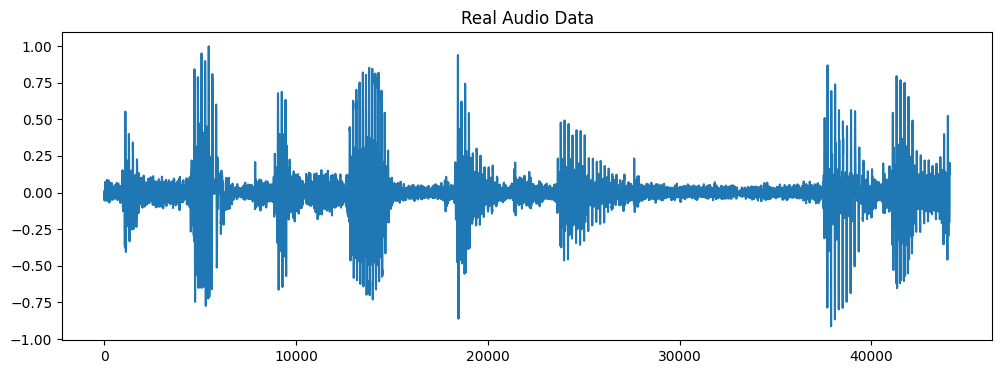

In [30]:
real_ad, real_sr = librosa.load(real_2sec_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(real_ad)

plt.title("Real Audio Data")

plt.show()

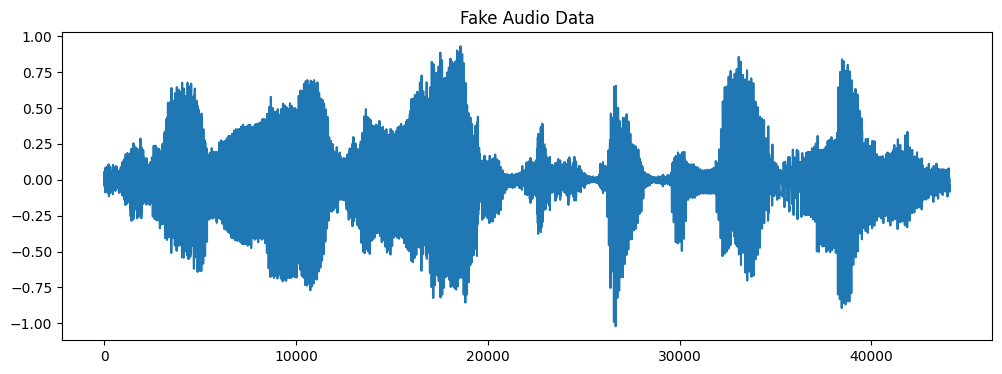

In [31]:
real_ad, real_sr = librosa.load(fake_2sec_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(real_ad)

plt.title("Fake Audio Data")

plt.show()

# #***Data loading norm***

In [32]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

real_norm_audio=[]

fake_norm_audio=[]

fake_norm_audio_path='/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake'

real_norm_audio_path='/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real'

# for _dir in fake_audio_path:

for filename in os.listdir(fake_norm_audio_path):

#     if filename.endswith('.wav'):

    fake_norm_audio.append(os.path.join(fake_norm_audio_path, filename))
    
# for _dir in real_audio_path:

for filename in os.listdir(real_norm_audio_path):

#     if filename.endswith('.wav'):

    real_norm_audio.append(os.path.join(real_norm_audio_path, filename))

In [33]:
# For-norm dataset

print("Number of tuples in fake_audio dataset: ", len(fake_norm_audio))
print("Number of tuples in real_audio dataset: ", len(real_norm_audio))

Number of tuples in fake_audio dataset:  26927
Number of tuples in real_audio dataset:  26941


***Fake norm***

In [34]:
import os
folders_fake_norm = os.listdir(fake_norm_audio_path)

***preprocessing and feature extraction fakenorm***

In [35]:
import os

fake_norm_data = []

for file in tqdm(folders_fake_norm):
    file_path = os.path.join(fake_norm_audio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    fake_norm_data.append(mfccs_features_scaled)

#     labels.append(folder)

100%|██████████| 26927/26927 [10:26<00:00, 42.96it/s]


In [36]:
import pandas as pd

df = pd.DataFrame(fake_norm_data)

# Add column names (optional but recommended)
num_mfccs = fake_norm_data[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/fake_norm_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/fake_norm_audio.xlsx


***Real norm***

In [37]:
import os

folders_real_norm = os.listdir(real_norm_audio_path)

***preprocessing and feature extraction realnorm***

In [38]:
import os

real_norm_data = []

for file in tqdm(folders_real_norm):
    file_path = os.path.join(real_norm_audio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    real_norm_data.append(mfccs_features_scaled)

 61%|██████    | 16442/26941 [08:41<04:47, 36.46it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
100%|██████████| 26941/26941 [14:31<00:00, 30.90it/s]


In [39]:
import pandas as pd

df = pd.DataFrame(real_norm_data)

# Add column names (optional but recommended)
num_mfccs = real_norm_data[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/real_norm_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/real_norm_audio.xlsx


In [40]:
!ls /kaggle/working

fake_2sec_audio.xlsx  __notebook__.ipynb    real_norm_audio.xlsx
fake_audio.xlsx       real_2sec_audio.xlsx
fake_norm_audio.xlsx  real_audio.xlsx


In [41]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# #***MFCC Coefficient extraction***

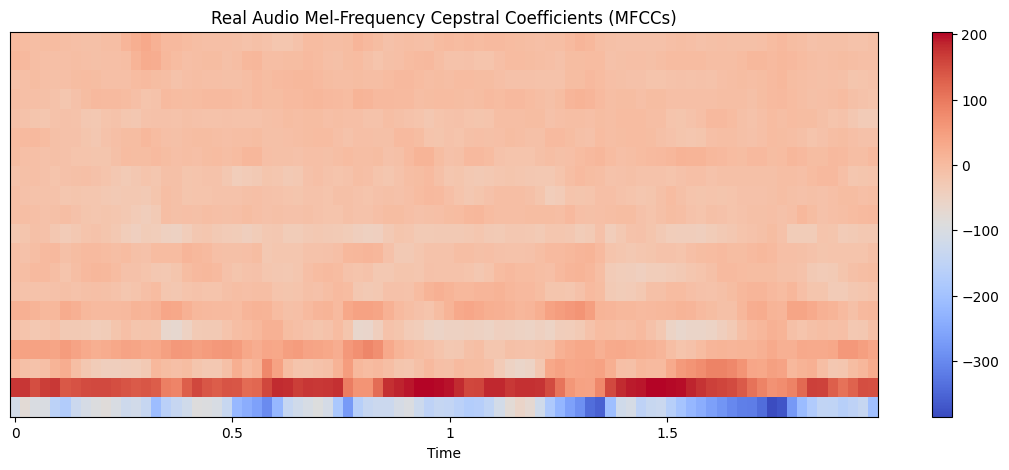

In [42]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake/recording1.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

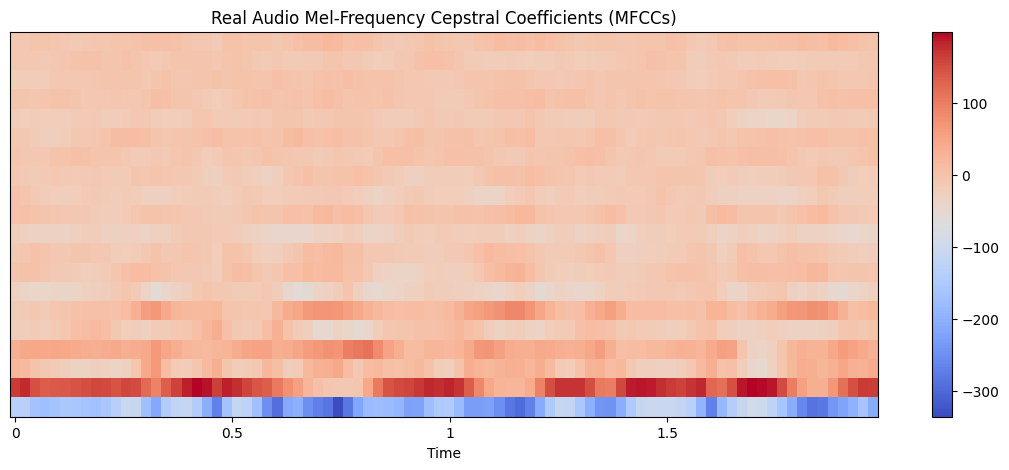

In [43]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake/recording1013.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

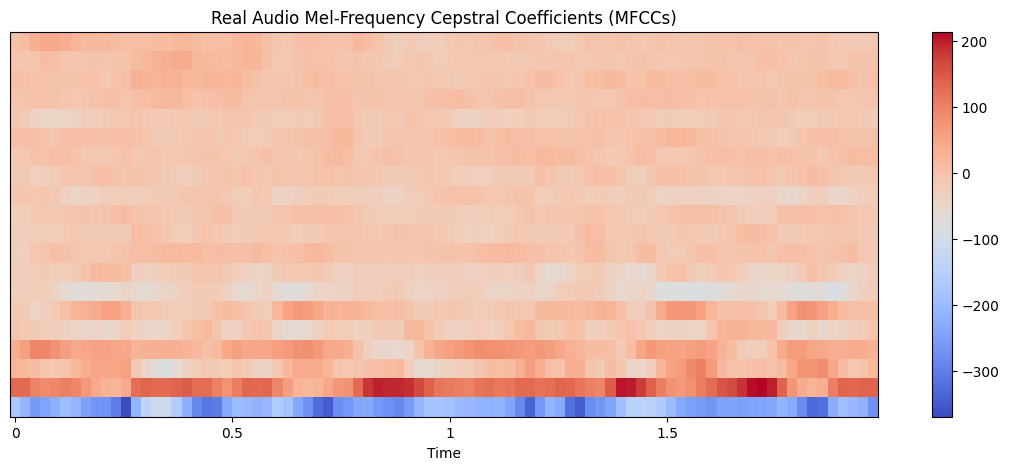

In [44]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real/recording10006.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

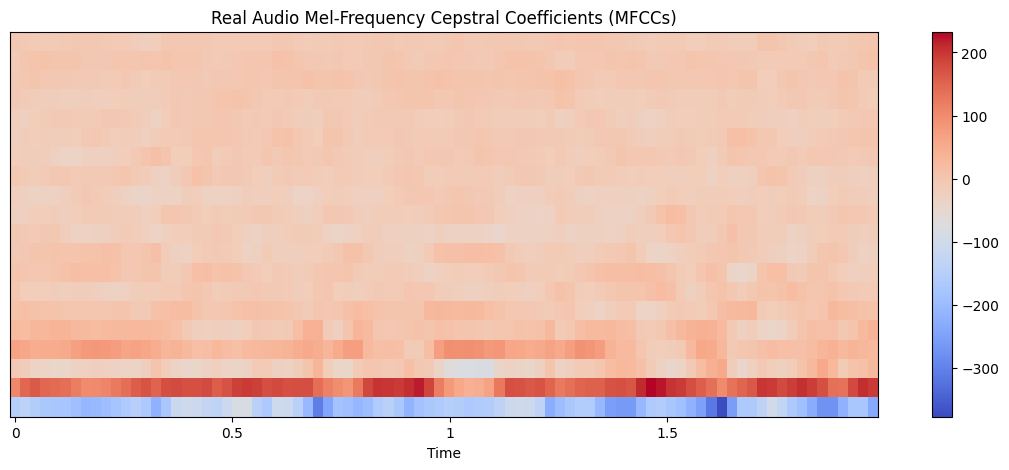

In [45]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real/recording10039.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

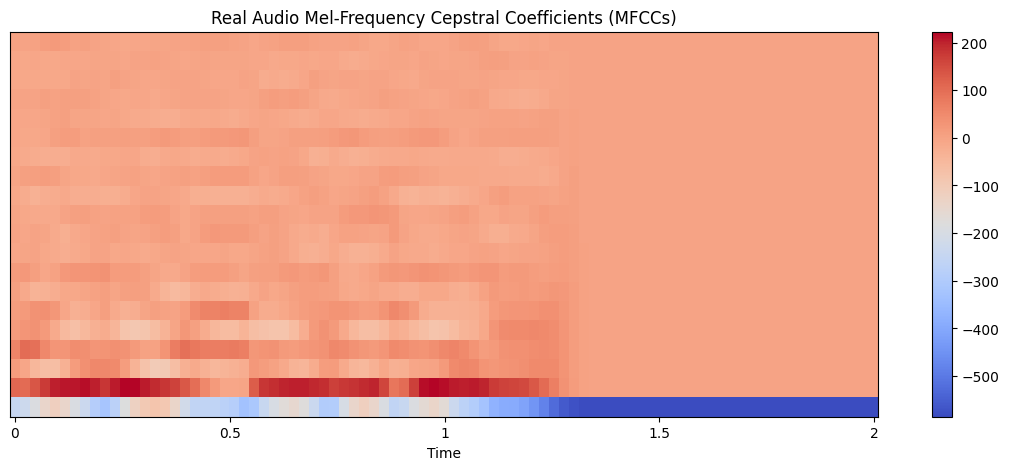

In [46]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake/file10058.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

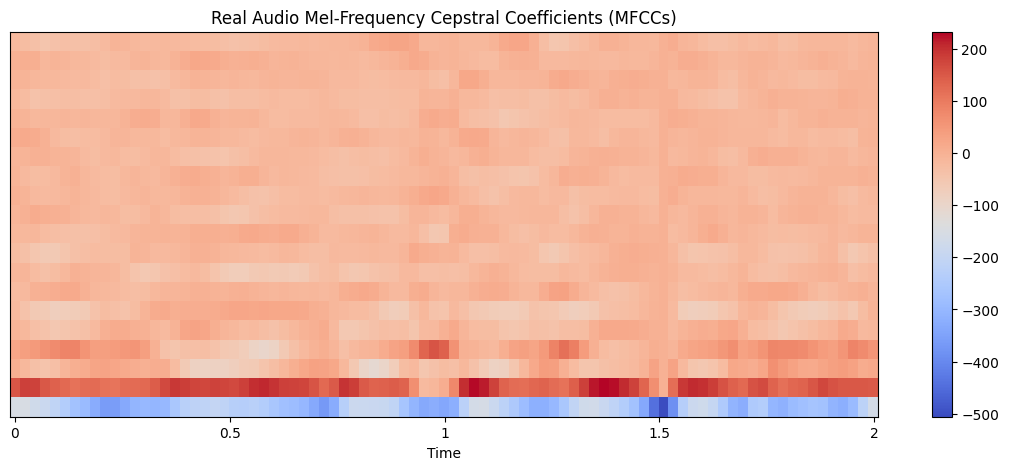

In [47]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake/file10286.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

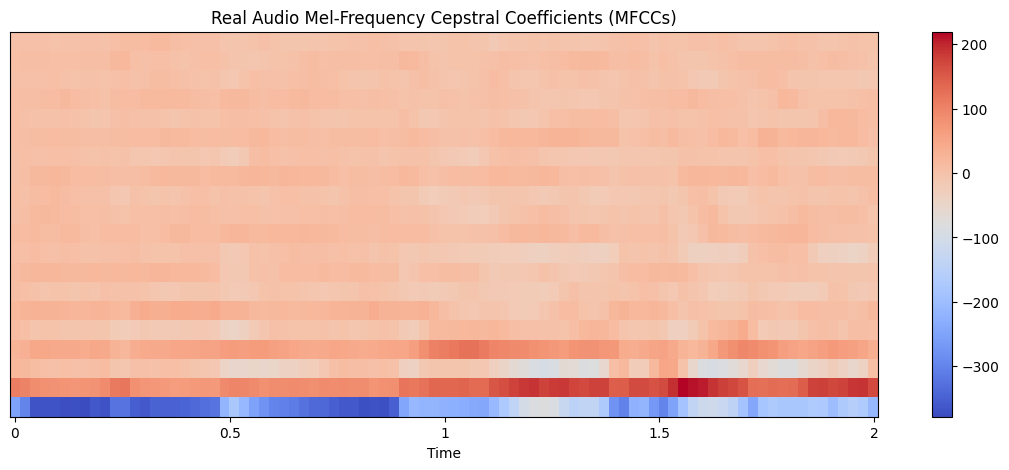

In [48]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real/file10075.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

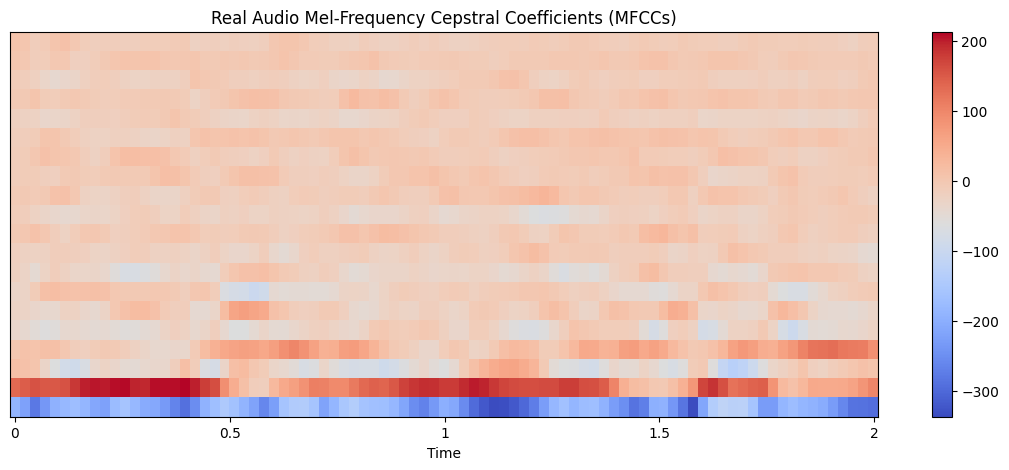

In [49]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real/file10269.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

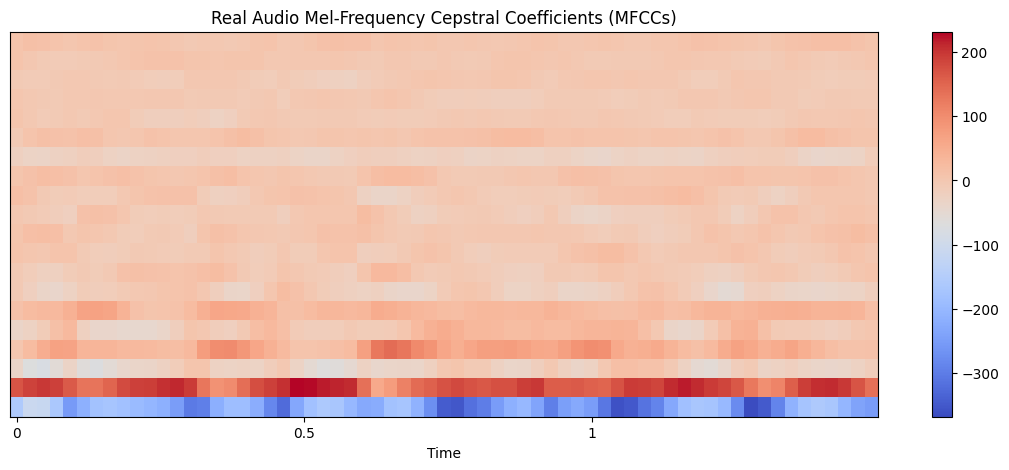

In [50]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake/file10016.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

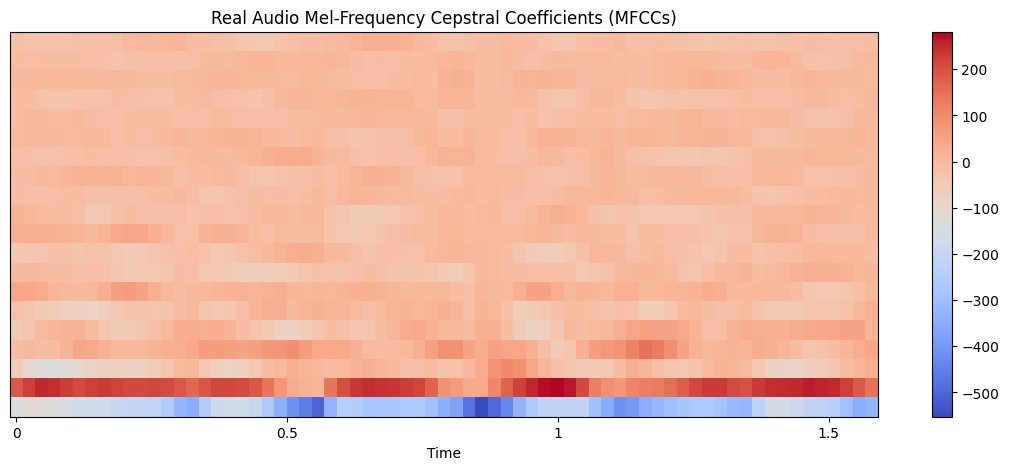

In [51]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake/file10064.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

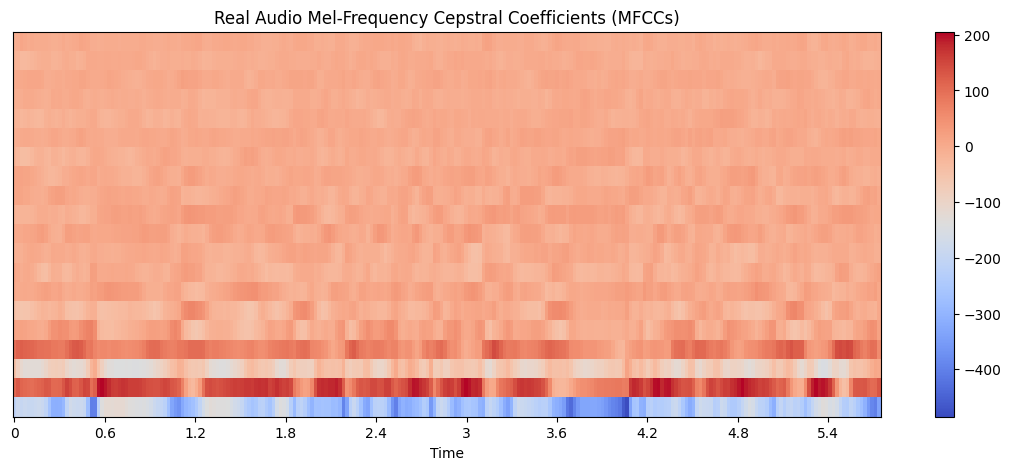

In [52]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real/file10025.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

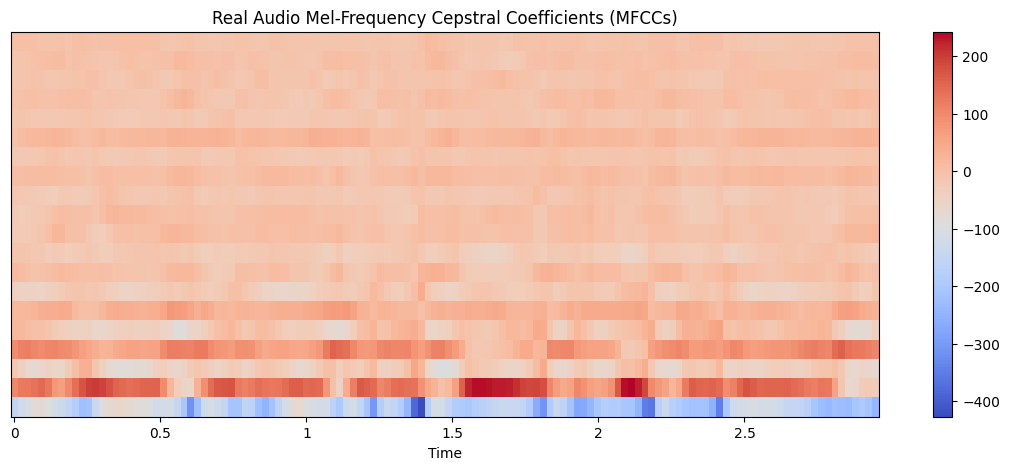

In [53]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real/file10095.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

In [54]:
import pandas as pd

data=pd.read_excel("/kaggle/input/rerec-audio-data/rerec_audio.xlsx")

***Scaling of rerec***

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:41]

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,41]
normalized_df.insert(0, "AUDIO", df.iloc[:,0])

print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)

Original Data:
             AUDIO      MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4  \
0          AUDIO 1 -204.293182  155.334351  12.078605  30.018124   7.137199   
1          AUDIO 2 -206.292389  125.856575   9.826826  40.660130 -38.902798   
2          AUDIO 3 -233.224564  164.963974 -38.348644  49.306095 -20.412888   
3          AUDIO 4 -158.866623  147.527008   2.515292  52.498569 -17.811068   
4          AUDIO 5 -304.994537  162.594955  40.751934  -3.574220 -11.813849   
...            ...         ...         ...        ...        ...        ...   
10203  AUDIO 10204 -221.205414  140.908203   6.261117  29.758522 -31.344320   
10204  AUDIO 10205 -154.527130  153.846451  -9.723347  21.997433 -18.574005   
10205  AUDIO 10206 -158.313690  122.770607   4.929123  49.259727 -34.499729   
10206  AUDIO 10207 -169.652679  179.840500   8.028708  29.831821  -3.372279   
10207  AUDIO 10208 -196.727417  102.709068 -11.926869  46.425983 -41.250317   

          MFCC_5     MFCC_6     MFCC

In [56]:
# import os
# import librosa
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from hashlib import md5

# # Path to your dataset
# dataset_path = "/kaggle/input/rerec-audio-xlsx/rerec_audio.xlsx"
# processed_path = "/kaggle/working/"
# os.makedirs(processed_path, exist_ok=True)

# # Initialize Standard Scaler for normalization
# scaler = StandardScaler()

# # Helper function to check 0-bit files
# for file_path in dataset_path
#     def is_zero_bit(file_path):
#         return os.path.getsize(file_path) == 0

# # Function to preprocess audio files
# def preprocess_audio_files(dataset_path, target_sample_rate=16000):
#     # Dictionary to track duplicates
#     file_hashes = set()
    
#     for root, _, files in os.walk(dataset_path):
#         for file in files:
#             file_path = os.path.join(root, file)
            
#             # Skip 0-bit files
#             if is_zero_bit(file_path):
#                 print(f"Skipping 0-bit file: {file}")
#                 continue
            
#             # Load audio file
#             try:
#                 audio, sr = librosa.load(file_path, sr=target_sample_rate)
#             except Exception as e:
#                 print(f"Error loading {file_path}: {e}")
#                 continue
            
#             # Check for duplicate files by hash
#             file_hash = md5(audio.tobytes()).hexdigest()
#             if file_hash in file_hashes:
#                 print(f"Skipping duplicate file: {file}")
#                 continue
#             file_hashes.add(file_hash)
            
#             # Zero-pad or trim to target length (16000 samples)
#             if len(audio) < target_sample_rate:
#                 audio = np.pad(audio, (0, target_sample_rate - len(audio)), mode='constant')
#             else:
#                 audio = audio[:target_sample_rate]
            
#             # Standardize audio using StandardScaler
#             audio = scaler.fit_transform(audio.reshape(-1, 1)).flatten()
            
#             # Save processed audio file
#             output_file_path = os.path.join(processed_path, file)
#             librosa.output.write_wav(output_file_path, audio, target_sample_rate)
#             print(f"Processed and saved: {output_file_path}")
# # Run the preprocessing
# preprocess_audio_files(dataset_path, processed_path)

                

In [57]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load your dataset (replace 'your_dataset.csv' with your dataset file)
# # Ensure that you have a column labeled 'output' or rename it accordingly
# data = pd.read_excel("/kaggle/input/rerec-audio-xlsx/rerec_audio.xlsx")

# # Check the unique categories in the output column
# output_categories = data['LABEL'].unique()

# df=pd.DataFrame(data)
# # Separate the data by categories
# for category in output_categories:
#     subset = df[df['LABEL'] == category]
    
#     # Scatter plot for two numerical columns by category
#     subset.hist(bins=20, figsize=(15, 10))

#     plt.xlabel(category)
#     plt.ylabel('Feature 2')
#     plt.tight_layout()

#     plt.show()


In [58]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("jasminpradhan/2sec-audio")

# print("Path to dataset files:", path)

***Scaling of 2sec***

In [59]:
# 2sec dataset normalisation

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert to DataFrame
sec2_df = pd.DataFrame(data)
sec2_df1=sec2_df.iloc[:,1:41]

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

In [60]:
# Apply Min-Max normalization
sec2_normalized_data = scaler.fit_transform(sec2_df1)

# Convert the normalized data back to a DataFrame
sec2_normalized_df = pd.DataFrame(sec2_normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
sec2_normalized_df["LABEL"]=sec2_df.iloc[:,41]
sec2_normalized_df.insert(0, "AUDIO", sec2_df.iloc[:,0])


print("Original Data:")
print(sec2_df)
print("\nNormalized Data:")
print(sec2_normalized_df)

Original Data:
             AUDIO      MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4  \
0          AUDIO 1 -204.293182  155.334351  12.078605  30.018124   7.137199   
1          AUDIO 2 -206.292389  125.856575   9.826826  40.660130 -38.902798   
2          AUDIO 3 -233.224564  164.963974 -38.348644  49.306095 -20.412888   
3          AUDIO 4 -158.866623  147.527008   2.515292  52.498569 -17.811068   
4          AUDIO 5 -304.994537  162.594955  40.751934  -3.574220 -11.813849   
...            ...         ...         ...        ...        ...        ...   
10203  AUDIO 10204 -221.205414  140.908203   6.261117  29.758522 -31.344320   
10204  AUDIO 10205 -154.527130  153.846451  -9.723347  21.997433 -18.574005   
10205  AUDIO 10206 -158.313690  122.770607   4.929123  49.259727 -34.499729   
10206  AUDIO 10207 -169.652679  179.840500   8.028708  29.831821  -3.372279   
10207  AUDIO 10208 -196.727417  102.709068 -11.926869  46.425983 -41.250317   

          MFCC_5     MFCC_6     MFCC

In [61]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load your dataset (replace 'your_dataset.csv' with your dataset file)
# # Ensure that you have a column labeled 'output' or rename it accordingly
# sec2_data = pd.read_excel("/kaggle/input/2sec-audio/2sec_audio_dataset.xlsx")

# # Check the unique categories in the output column
# output_categories = sec2_data['LABEL'].unique()

# sec2_df=pd.DataFrame(sec2_data)
# # Separate the data by categories
# for category in output_categories:
#     sec2_subset = sec2_df[sec2_df['LABEL'] == category]
    
#     # Scatter plot for two numerical columns by category
#     sec2_subset.hist(bins=20, figsize=(15, 10))

#     plt.xlabel(category)
#     plt.ylabel('MFCCs')
#     plt.tight_layout()

#     plt.show()


In [62]:
from sklearn import svm

# ****Testing data****

# ***Testing data loading for_rerec***

In [63]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

realtest_rerec_audio=[]

faketest_rerec_audio=[]

faketest_rerecaudio_path='/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/testing/fake'

realtest_rerecaudio_path='/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/testing/real'

# for _dir in fake_audio_path:

for filename in os.listdir(faketest_rerecaudio_path):

    if filename.endswith('.wav'):

        faketest_rerec_audio.append(os.path.join(faketest_rerecaudio_path, filename))

#         print(filename)

            

# for _dir in real_audio_path:

for filename in os.listdir(realtest_rerecaudio_path):

    if filename.endswith('.wav'):

        realtest_rerec_audio.append(os.path.join(realtest_rerecaudio_path, filename))




In [64]:
import librosa

import matplotlib.pyplot as plt

import seaborn as sns

from tqdm import tqdm

import IPython

from librosa import display

from IPython import display as ipd

In [65]:
print("Number of tuples in fake_audio dataset: ", len(faketest_rerec_audio))
print("Number of tuples in real_audio dataset: ", len(realtest_rerec_audio))


Number of tuples in fake_audio dataset:  408
Number of tuples in real_audio dataset:  408


In [66]:
import os

def remove_zero_byte_files(folder_testdata):
    # Loop through all files in the specified directory
    for filename in os.listdir(folder_testdata):
        file_path = os.path.join(folder_testdata, filename)
        
        # Check if it's a file and if its size is 0 bytes
        if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
            print(f"Removing {file_path}")
            os.remove(file_path)

        # print("hello")
# Specify the directory containing your audio files
directory_path = realtest_rerecaudio_path  # Replace with your directory path
remove_zero_byte_files(directory_path)

In [67]:
import os
import hashlib

def calculate_md5(file_path, chunk_size=4096):
    """Calculates MD5 hash of a file to identify duplicates."""
    hash_md5 = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def remove_duplicates(directory):
    """Remove duplicate files in a directory based on file content."""
    hashes = {}  # Dictionary to store hashes and their corresponding file paths

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Ensure it is a file and not a directory
        if os.path.isfile(file_path):
            # Calculate hash of the file
            file_hash = calculate_md5(file_path)
            
            # Check if the hash already exists in the dictionary
            if file_hash in hashes:
                print(f"Duplicate found and removing: {file_path}")
                os.remove(file_path)
            else:
                hashes[file_hash] = file_path

    print("Finished removing duplicate files.")

# Usage
directory = realtest_rerecaudio_path  # Replace with the actual path
remove_duplicates(directory)


Finished removing duplicate files.


In [68]:
!pip install librosa scikit-learn

In [69]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler

def preprocess_audio(file_path, target_sample_rate=16000, target_length=16000):
    """Load, resample, pad, and normalize audio data."""
    # Load audio with librosa at the target sample rate
    audio, sample_rate = librosa.load(file_path, sr=target_sample_rate)
    
    # Zero-padding or truncation to match the target length
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)), 'constant')
    else:
        audio = audio[:target_length]
    
    return audio

def standardize_audio_data(directory):
    """Process all audio files in a directory and normalize data."""
    audio_data = []
    
    # Process each audio file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        if os.path.isfile(file_path) and filename.lower().endswith(('.wav', '.mp3')):
            audio = preprocess_audio(file_path)
            audio_data.append(audio)
    
    # Convert to numpy array for batch processing
    audio_data = np.array(audio_data)
    
    # Apply StandardScaler normalization
    scaler = StandardScaler()
    audio_data_normalized = scaler.fit_transform(audio_data)
    
    return audio_data_normalized

# Usage
directory = realtest_rerecaudio_path  # Replace with the actual path
processed_data = standardize_audio_data(directory)
    
# Now, processed_data contains zero-padded and normalized audio samples ready for model training.

In [70]:
preprocessed_realtest_rerec=[]
for filename in os.listdir(realtest_rerecaudio_path):

    if filename.endswith('.wav'):

        preprocessed_realtest_rerec.append(os.path.join(realtest_rerecaudio_path, filename))

In [71]:
print("Number of tuples in real_audio dataset: ", len(preprocessed_realtest_rerec))

Number of tuples in real_audio dataset:  408


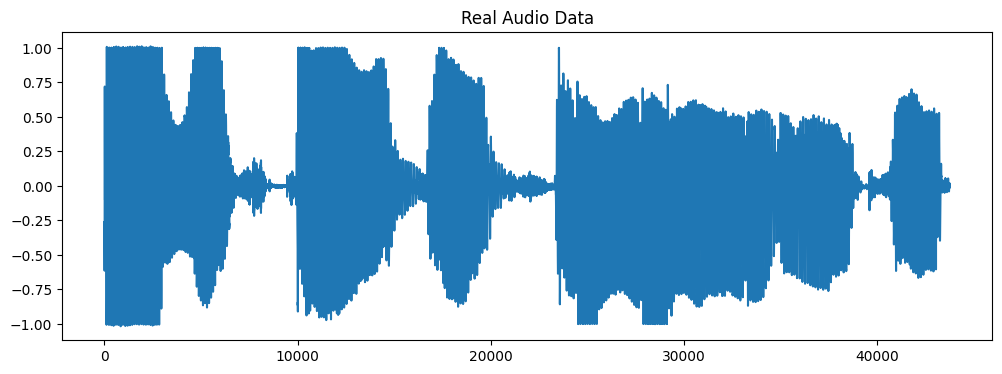

In [72]:
realtest_ad, realtest_sr = librosa.load(realtest_rerec_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(realtest_ad)

plt.title("Real Audio Data")

plt.show()

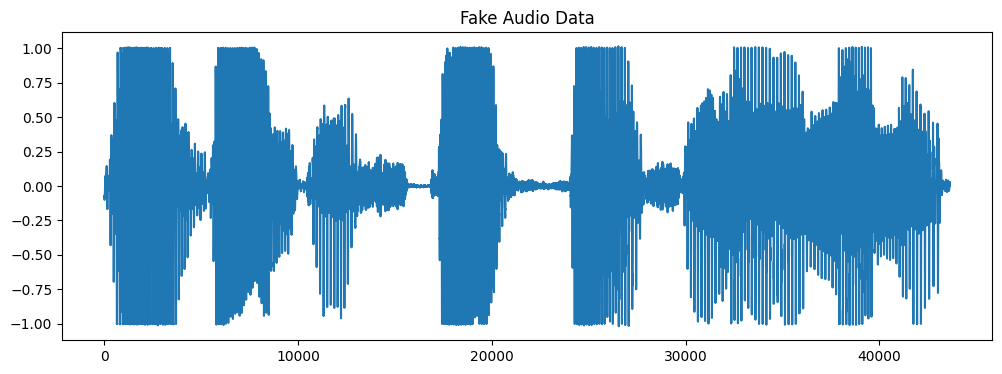

In [73]:
faketest_ad, faketest_sr = librosa.load(faketest_rerec_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(faketest_ad)

plt.title("Fake Audio Data")

plt.show()

***Preprocessing and feature extraction of fake_rerec***

In [74]:
import os

folders = os.listdir(faketest_rerecaudio_path)

rerec_faketest_data = [] 
labels = []

for file in tqdm(folders):
    file_path = os.path.join(faketest_rerecaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    rerec_faketest_data.append(mfccs_features_scaled)

#     labels.append(folder)

100%|██████████| 408/408 [00:10<00:00, 37.99it/s]


In [75]:
import pandas as pd

df = pd.DataFrame(rerec_faketest_data)

# Add column names (optional but recommended)
num_mfccs = rerec_faketest_data[0].shape[0]  # Assuming all have the same number of MFCCs
df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/faketest_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/faketest_audio.xlsx


In [76]:
!rm -rf /kaggle/working/fake_audio.xlsx

***Preprocessing and feature extraction of real_rerec***

In [77]:
import os

folders = os.listdir(realtest_rerecaudio_path)

rerec_realtest_data = [] 
labels = []

for file in tqdm(folders):
    file_path = os.path.join(realtest_rerecaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    rerec_realtest_data.append(mfccs_features_scaled)

100%|██████████| 408/408 [00:04<00:00, 88.83it/s]


In [78]:
import pandas as pd

df = pd.DataFrame(rerec_realtest_data)

# Add column names (optional but recommended)
num_mfccs = rerec_realtest_data[0].shape[0]  # Assuming all have the same number of MFCCs
df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/realtest_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/realtest_audio.xlsx


In [79]:
!ls /kaggle/working

fake_2sec_audio.xlsx  __notebook__.ipynb    real_norm_audio.xlsx
fake_norm_audio.xlsx  real_2sec_audio.xlsx  realtest_audio.xlsx
faketest_audio.xlsx   real_audio.xlsx


# ***Testing data loading for_2sec***

In [80]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

realtest_2sec_audio=[]

faketest_2sec_audio=[]

faketest_2secaudio_path='/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/testing/fake'

realtest_2secaudio_path='/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/testing/real'

# for _dir in fake_audio_path:

for filename in os.listdir(faketest_2secaudio_path):

    if filename.endswith('.wav'):

        faketest_2sec_audio.append(os.path.join(faketest_2secaudio_path, filename))

#         print(filename)

            

# for _dir in real_audio_path:

for filename in os.listdir(realtest_2secaudio_path):

    if filename.endswith('.wav'):

        realtest_2sec_audio.append(os.path.join(realtest_2secaudio_path, filename))


In [81]:
print("Number of tuples in fake_audio dataset: ", len(faketest_2sec_audio))
print("Number of tuples in real_audio dataset: ", len(realtest_2sec_audio))

Number of tuples in fake_audio dataset:  544
Number of tuples in real_audio dataset:  544


***Preprocessing and feature extraction of fake 2sec***

In [82]:
import os

folders = os.listdir(faketest_2secaudio_path)

faketest_2sec_data = []

for file in tqdm(folders):
    file_path = os.path.join(faketest_2secaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    faketest_2sec_data.append(mfccs_features_scaled)

100%|██████████| 544/544 [00:11<00:00, 47.43it/s]


In [83]:
import pandas as pd

df = pd.DataFrame(faketest_2sec_data)

# Add column names (optional but recommended)
num_mfccs = faketest_2sec_data[0].shape[0]  # Assuming all have the same number of MFCCs
df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/fake2sectest_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/fake2sectest_audio.xlsx


***Preprocessing and feature extraction of real 2sec***

In [84]:
import os

folders = os.listdir(realtest_2secaudio_path)

realtest_2sec_data = []

for file in tqdm(folders):
    file_path = os.path.join(realtest_2secaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    realtest_2sec_data.append(mfccs_features_scaled)

100%|██████████| 544/544 [00:11<00:00, 47.22it/s]


In [85]:
import pandas as pd

df = pd.DataFrame(realtest_2sec_data)

# Add column names (optional but recommended)
num_mfccs = realtest_2sec_data[0].shape[0]  # Assuming all have the same number of MFCCs
df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/real2sectest_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/real2sectest_audio.xlsx


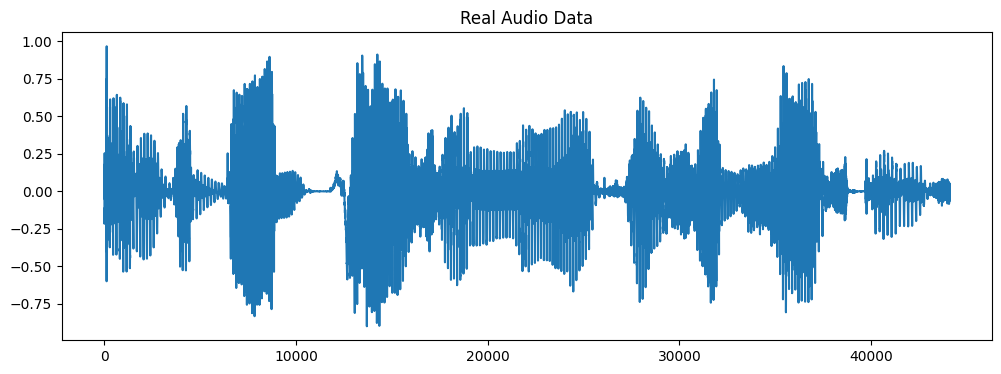

In [86]:
realtest_ad, realtest_sr = librosa.load(realtest_2sec_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(realtest_ad)

plt.title("Real Audio Data")

plt.show()

# ***Testing data loading for_norm***

In [87]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

realtest_norm_audio=[]

faketest_norm_audio=[]

faketest_normaudio_path='/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/testing/fake'

realtest_normaudio_path='/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/testing/real'

# for _dir in fake_audio_path:

for filename in os.listdir(faketest_normaudio_path):

    if filename.endswith('.wav'):

        faketest_norm_audio.append(os.path.join(faketest_normaudio_path, filename))

#         print(filename)

            

# for _dir in real_audio_path:

for filename in os.listdir(realtest_normaudio_path):

    if filename.endswith('.wav'):

        realtest_norm_audio.append(os.path.join(realtest_normaudio_path, filename))


In [88]:
print("Number of tuples in fake_audio dataset: ", len(faketest_norm_audio))
print("Number of tuples in fake_audio dataset: ", len(realtest_norm_audio))

Number of tuples in fake_audio dataset:  2370
Number of tuples in fake_audio dataset:  2264


***Preprocessing and feature extraction of real norm***

In [89]:
import os

folders = os.listdir(realtest_normaudio_path)

realtest_norm_data = []

for file in tqdm(folders):
    file_path = os.path.join(realtest_normaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    realtest_norm_data.append(mfccs_features_scaled)

100%|██████████| 2264/2264 [00:57<00:00, 39.59it/s]


In [90]:
import pandas as pd

df = pd.DataFrame(realtest_norm_data)

# Add column names (optional but recommended)
num_mfccs = realtest_norm_data[0].shape[0]  # Assuming all have the same number of MFCCs
df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/realnormtest_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/realnormtest_audio.xlsx


***Preprocessing and feature extraction of fake norm***

In [91]:
import os

folders = os.listdir(faketest_normaudio_path)

faketest_norm_data = []

for file in tqdm(folders):
    file_path = os.path.join(faketest_normaudio_path, file)
    audio, sample_rate = librosa.load(file_path)        
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
    faketest_norm_data.append(mfccs_features_scaled)

100%|██████████| 2370/2370 [00:54<00:00, 43.52it/s]


In [92]:
import pandas as pd

df = pd.DataFrame(faketest_norm_data)

# Add column names (optional but recommended)
num_mfccs = faketest_norm_data[0].shape[0]  # Assuming all have the same number of MFCCs
df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]

# Save DataFrame to Excel
excel_file_path = '/kaggle/working/fakenormtest_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/fakenormtest_audio.xlsx


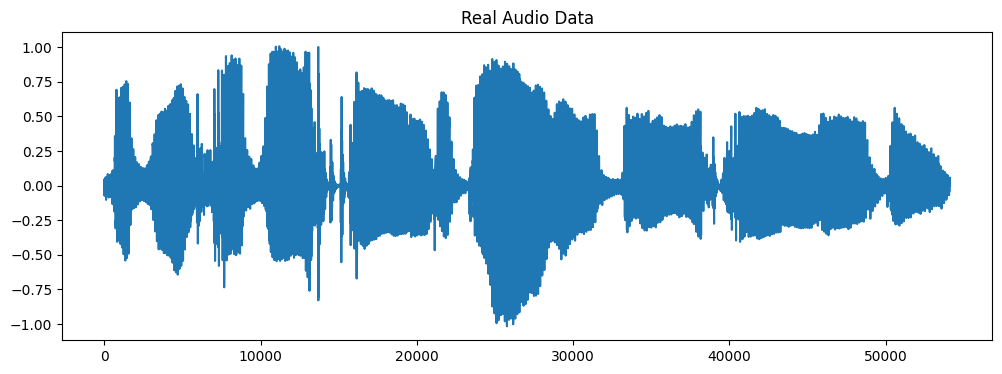

In [93]:
realtest_ad, realtest_sr = librosa.load(realtest_norm_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(realtest_ad)

plt.title("Real Audio Data")

plt.show()

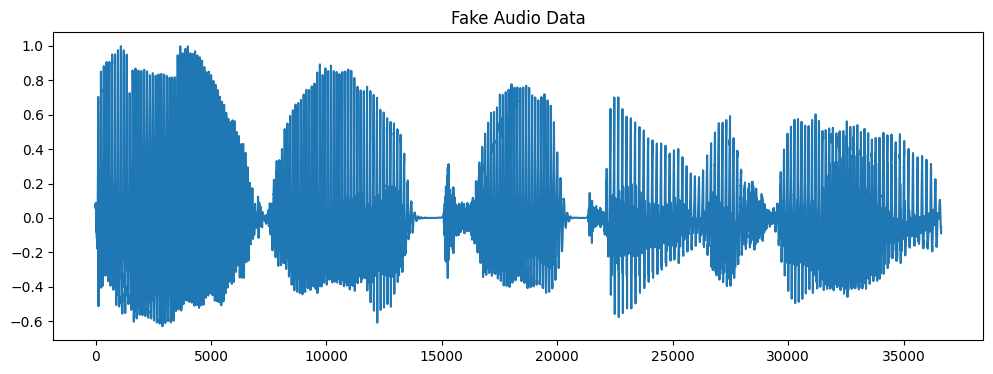

In [94]:
realtest_ad, realtest_sr = librosa.load(faketest_norm_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(realtest_ad)

plt.title("Fake Audio Data")

plt.show()

# ***MFCC Coefficient extraction***

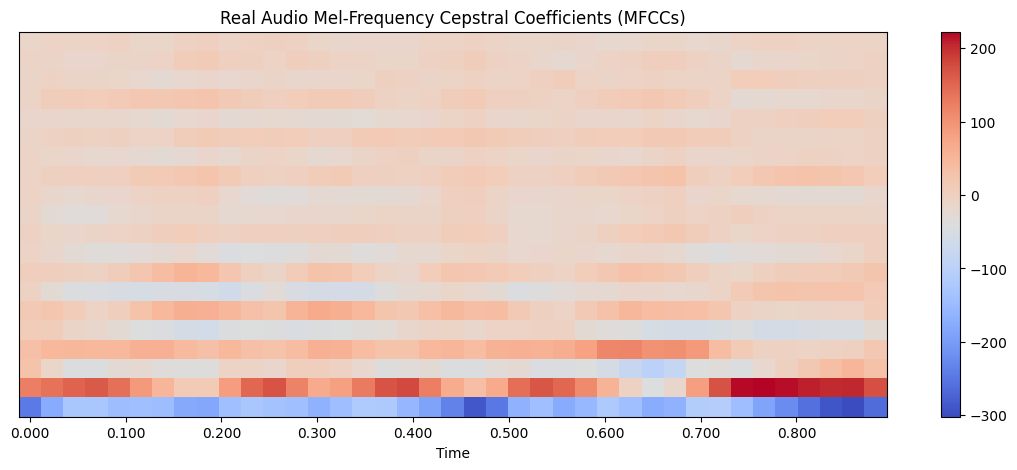

In [95]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/testing/fake/file1002.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

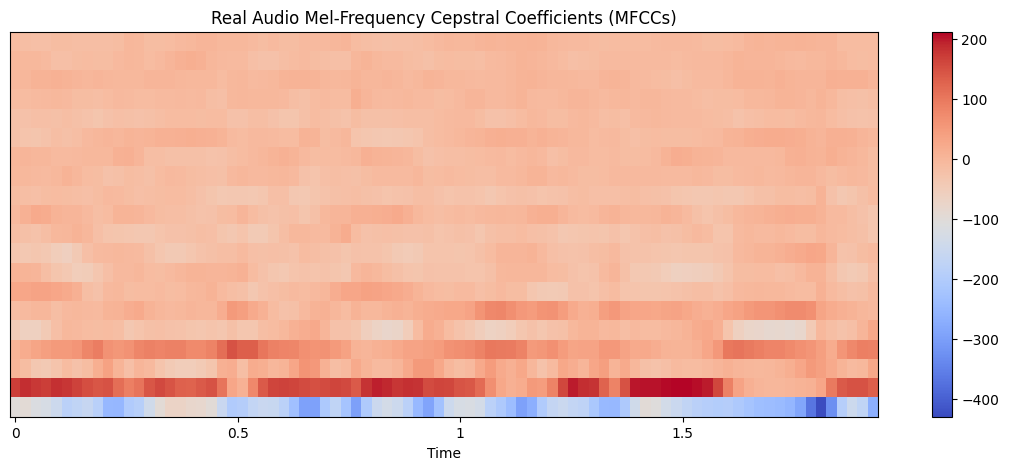

In [96]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/testing/real/recording13566.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

# ***Scaling of real and fake rerec data***

In [97]:
import pandas as pd
data=pd.read_excel('/kaggle/working/faketest_audio.xlsx')

In [98]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:39]

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,39]
normalized_df.insert(0, "AUDIO", df.iloc[:,0])

print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)

Original Data:
         MFCC_0      MFCC_1    MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0   -140.781143  145.186172 -9.554001  25.727365 -20.511538  17.765112   
1   -158.007645  170.885345 -8.826342  22.415697 -26.202164  17.314926   
2   -161.506851  146.807175  2.507119  35.043468 -13.750941  13.621719   
3   -150.600723  153.256775 -0.028713  17.945061 -20.664019  18.776409   
4   -171.905792  146.175842 -4.865965  31.897903 -10.674135  16.396523   
..          ...         ...       ...        ...        ...        ...   
403 -142.359116  146.898636 -5.387515  28.010933 -18.403179  21.718180   
404 -161.064941  150.845535 -0.605749  27.202946 -12.209374  17.537012   
405 -164.368057  161.443970 -1.899757  19.211437 -11.608096  11.339540   
406 -168.320587  143.045975  2.957811  20.396688  -9.249763  24.178959   
407 -160.063675  155.155029 -3.916959  36.762539 -16.413145  22.842016   

        MFCC_6     MFCC_7     MFCC_8     MFCC_9  ...   MFCC_30   MFCC_31  \
0   -25.708729 -14.2

In [99]:
import pandas as pd
data=pd.read_excel('/kaggle/working/realtest_audio.xlsx')

In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:39]

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,39]
normalized_df.insert(0, "AUDIO", df.iloc[:,0])

print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)

Original Data:
         MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0   -199.807709  142.521255  11.164929  35.979061 -24.937355   7.415248   
1   -208.380402  130.644333   3.080961  61.546127 -31.935413  23.379570   
2   -229.599304  137.814224   6.191186  38.245228 -23.669655  20.014080   
3   -171.958405  145.153122  -0.120517  35.754864 -21.162739  12.183922   
4   -203.004303  133.351746  12.895094  49.075935 -20.411953  10.833570   
..          ...         ...        ...        ...        ...        ...   
403 -260.179382  140.351929  37.739494  39.038559 -26.275805   5.743116   
404 -223.229950  154.289642   8.229237  43.216881 -39.145237  21.300501   
405 -192.169815  146.097107   2.393221  29.479486 -31.236095  26.195843   
406 -202.851654  144.484573   8.629895  35.166794 -21.167185  17.207315   
407 -178.064575  129.407394   3.082803  28.603495 -19.751501  15.954096   

        MFCC_6     MFCC_7     MFCC_8     MFCC_9  ...   MFCC_30   MFCC_31  \
0   -18.

 # ***Scaling of real and fake norm data***

In [101]:
import pandas as pd

data=pd.read_excel("/kaggle/working/realnormtest_audio.xlsx")

In [102]:
print(df.columns)

Index(['MFCC_0', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6',
       'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12',
       'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18',
       'MFCC_19', 'MFCC_20', 'MFCC_21', 'MFCC_22', 'MFCC_23', 'MFCC_24',
       'MFCC_25', 'MFCC_26', 'MFCC_27', 'MFCC_28', 'MFCC_29', 'MFCC_30',
       'MFCC_31', 'MFCC_32', 'MFCC_33', 'MFCC_34', 'MFCC_35', 'MFCC_36',
       'MFCC_37', 'MFCC_38', 'MFCC_39'],
      dtype='object')


In [103]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:39]

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,39]
normalized_df.insert(0, "AUDIO", df.iloc[:,0])

print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)

Original Data:
          MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0    -184.809296  162.422409 -38.485455  31.000719 -23.675507  14.431887   
1    -215.744934  123.492210 -30.747366  56.551025 -23.104607  13.250799   
2    -226.654709  138.331924 -44.188904  50.587433 -27.055899  13.433425   
3    -187.487427  122.825676 -43.395855  59.606441 -31.630402   7.155342   
4    -201.072586  124.585457 -25.827295  71.510719 -30.253748  13.265172   
...          ...         ...        ...        ...        ...        ...   
2259 -180.956772  113.601051 -29.672693  93.751259 -14.371867   4.905972   
2260 -223.807556  124.564316 -25.692366  47.328316 -19.712009   4.924552   
2261 -201.788803  115.180374 -36.189625  59.933025 -37.159126   1.082990   
2262 -232.720108  115.320763 -26.511717  46.217247 -22.048965  10.072005   
2263 -208.326355  123.209816 -30.819012  41.764874 -26.286278  16.361210   

         MFCC_6     MFCC_7     MFCC_8    MFCC_9  ...   MFCC_30   MFCC_31

In [104]:
import pandas as pd

data=pd.read_excel("/kaggle/working/fakenormtest_audio.xlsx")

In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:39]

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,39]
normalized_df.insert(0, "AUDIO", df.iloc[:,0])

print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)

Original Data:
          MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0    -185.925308  154.390793 -16.462135  17.716928 -18.166399   6.775635   
1    -149.489487  117.413383 -37.036106  48.586807 -17.255716  16.082813   
2    -200.911316  125.662064 -11.535330  40.279758  -8.356350   2.699511   
3    -170.996765  127.590424 -27.077198  50.793076 -17.468180   5.700479   
4    -173.527069  153.154617 -21.557573  23.710934 -19.399387  12.633883   
...          ...         ...        ...        ...        ...        ...   
2365 -139.091354  134.711349 -63.226673  31.388203 -35.744530   9.679463   
2366 -198.821030  164.708313 -23.464668  17.301443 -21.957550  10.474108   
2367 -177.535019  138.726532 -37.430088  43.849045 -11.358907  12.903423   
2368 -210.919205  157.686096 -25.249157  27.375483 -23.149223  10.399486   
2369 -181.794266  132.693954 -32.564289  30.632463 -12.389051  12.746036   

         MFCC_6     MFCC_7     MFCC_8     MFCC_9  ...   MFCC_30   MFCC_3

# ***Scaling of real and fake 2sec data***

In [106]:
import pandas as pd
data=pd.read_excel('/kaggle/working/fake2sectest_audio.xlsx')


In [107]:
print(df.columns)

Index(['MFCC_0', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6',
       'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12',
       'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18',
       'MFCC_19', 'MFCC_20', 'MFCC_21', 'MFCC_22', 'MFCC_23', 'MFCC_24',
       'MFCC_25', 'MFCC_26', 'MFCC_27', 'MFCC_28', 'MFCC_29', 'MFCC_30',
       'MFCC_31', 'MFCC_32', 'MFCC_33', 'MFCC_34', 'MFCC_35', 'MFCC_36',
       'MFCC_37', 'MFCC_38', 'MFCC_39'],
      dtype='object')


In [108]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:39] # since number of columns is 39 and the columns have no name

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,39] # since number of columns is 39 and the columns have no name
normalized_df.insert(0, "AUDIO", df.iloc[:,0])

print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)

Original Data:
         MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0   -190.800018  131.798828 -17.502123  44.006439 -15.829427   6.568478   
1   -166.587402  151.766403 -51.138268  39.875378 -22.711176  11.452513   
2   -179.785294  140.252487 -32.024059  28.581396 -30.571676  12.769218   
3   -181.398056  124.149658 -30.024836  35.602055 -18.032757  11.902999   
4   -178.815918  128.834305 -31.289343  40.699268 -10.066341  14.198585   
..          ...         ...        ...        ...        ...        ...   
539 -215.820877  128.876633 -22.968311  16.976292 -11.728775  17.671402   
540 -187.038239  118.817360 -16.993073  34.888573 -12.510494  14.553840   
541 -201.656189  124.082893 -19.340292  31.545214 -12.574871  13.779973   
542 -177.296570  140.150711 -25.478165  42.610233  -9.052613   2.949861   
543 -184.409897  140.075455 -37.583546  50.271709 -18.096994  12.386766   

        MFCC_6    MFCC_7     MFCC_8     MFCC_9  ...   MFCC_30   MFCC_31  \
0    -6.6

In [109]:
import pandas as pd
data =pd.read_excel('/kaggle/working/real2sectest_audio.xlsx')

In [110]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:39] # since number of columns is 39 and the columns have no name

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,39] # since number of columns is 39 and the columns have no name
normalized_df.insert(0, "AUDIO", df.iloc[:,0])

print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)

Original Data:
         MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0   -191.667068  115.064529 -28.060738  75.429344 -13.560360  11.883184   
1   -224.527618  105.547844 -29.630268  72.889442 -27.101395  16.646297   
2   -233.451874  113.596481  -8.005668  48.987232 -15.400138   7.788476   
3   -220.575516  109.079620  -7.103908  55.436024 -12.305239   8.555539   
4   -219.020737  120.889000 -27.219183  59.100773 -29.882088  13.074279   
..          ...         ...        ...        ...        ...        ...   
539 -204.875336  139.255157 -30.131971  67.861092 -35.170185   2.559489   
540 -192.725327  125.354546 -26.941097  34.323563 -29.542017  15.411389   
541 -209.809875  158.135803 -31.776819  49.489616 -23.404789  -4.803447   
542 -183.237808  120.940590 -35.880566  61.478970 -30.647497  12.177747   
543 -248.739899  125.389763 -30.005402  66.189957 -25.043636  -9.040236   

        MFCC_6    MFCC_7     MFCC_8    MFCC_9  ...   MFCC_30   MFCC_31  \
0   -19.40

In [111]:
!pip install scikit-learn

In [112]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load datasets from Excel files
for_2sec = pd.read_excel('/kaggle/input/2sec-audio-data/2sec_audio.xlsx')
for_norm = pd.read_excel('/kaggle/input/norm-audio-data/norm_audio.xlsx')
for_rerec = pd.read_excel('/kaggle/input/rerec-audio-data/rerec_audio.xlsx')
model = svm.SVC(kernel='linear')  # You can change to 'poly' or other kernels if needed
label_encoder = LabelEncoder()

# Function to preprocess and train SVM model
def process_and_train_svm(df):
    # Extract features and labels
    X = df.iloc[:, 1:-1]  # All columns except the last one are features
    y = df.iloc[:, -1]   # The last column is the label

    
    y_encoded = label_encoder.fit_transform(y)

    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the SVM model
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for dataset: {accuracy * 100:.2f}%')

# Process and train SVM for each dataset
# print("Processing for-2sec dataset")
# process_and_train_svm(for_2sec)

# print("Processing for-norm dataset")
# process_and_train_svm(for_norm)

print("Processing for-rerec dataset")
process_and_train_svm(for_rerec)


Processing for-rerec dataset
Accuracy for dataset: 87.90%


In [113]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the testing dataset
testing_data = pd.read_excel('/kaggle/input/rerectest-audio-data/rerectest_audio.xlsx')

# Preprocess the testing data
# Exclude the first column (if needed) and the label column
X_test = testing_data.iloc[:, 1:-1]  # Adjust indices if necessary
y_test = testing_data.iloc[:, -1]    # Last column is the label ('FAKE' or 'REAL')

# Encode the labels ('FAKE' -> 0, 'REAL' -> 1)
y_test_encoded = label_encoder.fit_transform(y_test)

# Normalize the features using the same scaler used during training
scaler = MinMaxScaler(feature_range=(0, 1))  # Ensure consistency with training
X_test_scaled = scaler.fit_transform(X_test)  # Use `scaler.transform()` if the scaler is saved

# Predict using the trained model
y_pred = model.predict(X_test_scaled)
y_pred_encoded = label_encoder.transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f'Accuracy on testing data: {accuracy * 100:.2f}%')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_encoded))


Accuracy on testing data: 73.65%

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.52      0.66       408
        REAL       0.66      0.96      0.78       408

    accuracy                           0.74       816
   macro avg       0.79      0.74      0.72       816
weighted avg       0.79      0.74      0.72       816


Confusion Matrix:
[[211 197]
 [ 18 390]]


# **Important**

In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Load the datasets
train_data = pd.read_excel('/kaggle/input/rerec-audio-data/rerec_audio.xlsx')
test_data = pd.read_excel('/kaggle/input/rerectest-audio-data/rerectest_audio.xlsx')

# Preprocessing Function
def preprocess_data(df, drop_first_col=True):
    if drop_first_col:  # Drop first column if it's irrelevant
        X = df.iloc[:, 1:-1]
    else:
        X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y_encoded, label_encoder

# Preprocess training and testing datasets
X_train, y_train, label_encoder = preprocess_data(train_data)
X_test, y_test, _ = preprocess_data(test_data)

# Data Balancing with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature Engineering with PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test)

# Hyperparameter Tuning for SVM
param_grid = {
    'C': [80,100,120],
    'kernel': ['poly','sigmoid'],
    'gamma': [0.01,0.0075,0.02],  # For non-linear kernels
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2, scoring='accuracy')
grid_search.fit(X_train_pca, y_train_balanced)

# Best Model
model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-Validation Accuracy
cv_scores = cross_val_score(model, X_train_pca, y_train_balanced, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Train the Best Model
model.fit(X_train_pca, y_train_balanced)

# Test the Model
y_pred = model.predict(X_test_pca)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Testing Data: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=poly; total time=   3.6s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=poly; total time=   3.6s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=poly; total time=   3.6s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=poly; total time=   4.0s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=poly; total time=   4.1s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   2.5s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   2.5s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   2.4s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   2.7s
[CV] END C=80, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   2.7s
[CV] END C=80, class_weight=balanced, gamma=0.0075, kernel=poly; total time=   3.6s
[CV] END C=80, class

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Load the datasets
train_data = pd.read_excel('/kaggle/input/rerec-audio-data/rerec_audio.xlsx')
test_data = pd.read_excel('/kaggle/input/rerectest-audio-data/rerectest_audio.xlsx')

# Preprocessing Function
def preprocess_data(df, drop_first_col=True):
    if drop_first_col:  # Drop first column if it's irrelevant
        X = df.iloc[:, 1:-1]
    else:
        X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y_encoded, label_encoder

# Preprocess training and testing datasets
X_train, y_train, label_encoder = preprocess_data(train_data)
X_test, y_test, _ = preprocess_data(test_data)

# Data Balancing with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature Engineering with PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test)

# Hyperparameter Tuning for SVM
param_grid = {
    'C': [99.2,99.3,99.25],
    'kernel': ['sigmoid'],
    'gamma': [0.0061,0.0063,0.0062,0.0064],  # For non-linear kernels
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, scoring='accuracy')
grid_search.fit(X_train_pca, y_train_balanced)

# Best Model
model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-Validation Accuracy
cv_scores = cross_val_score(model, X_train_pca, y_train_balanced, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Train the Best Model
model.fit(X_train_pca, y_train_balanced)

# Test the Model
y_pred = model.predict(X_test_pca)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Testing Data: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END C=99.2, class_weight=balanced, gamma=0.0061, kernel=sigmoid; total time=   2.2s
[CV] END C=99.2, class_weight=balanced, gamma=0.0061, kernel=sigmoid; total time=   2.1s
[CV] END C=99.2, class_weight=balanced, gamma=0.0061, kernel=sigmoid; total time=   2.0s
[CV] END C=99.2, class_weight=balanced, gamma=0.0063, kernel=sigmoid; total time=   2.1s
[CV] END C=99.2, class_weight=balanced, gamma=0.0063, kernel=sigmoid; total time=   2.1s
[CV] END C=99.2, class_weight=balanced, gamma=0.0063, kernel=sigmoid; total time=   2.0s
[CV] END C=99.2, class_weight=balanced, gamma=0.0062, kernel=sigmoid; total time=   2.1s
[CV] END C=99.2, class_weight=balanced, gamma=0.0062, kernel=sigmoid; total time=   2.1s
[CV] END C=99.2, class_weight=balanced, gamma=0.0062, kernel=sigmoid; total time=   2.0s
[CV] END C=99.2, class_weight=balanced, gamma=0.0064, kernel=sigmoid; total time=   2.1s
[CV] END C=99.2, class_weight=balanced, gamma=0.0